<a href="https://www.kaggle.com/code/yacharki/your-own-personal-notebooks-dashboard?scriptVersionId=193293465" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Your Username = Your Own Personal 📚 Notebooks Dashboard 📊

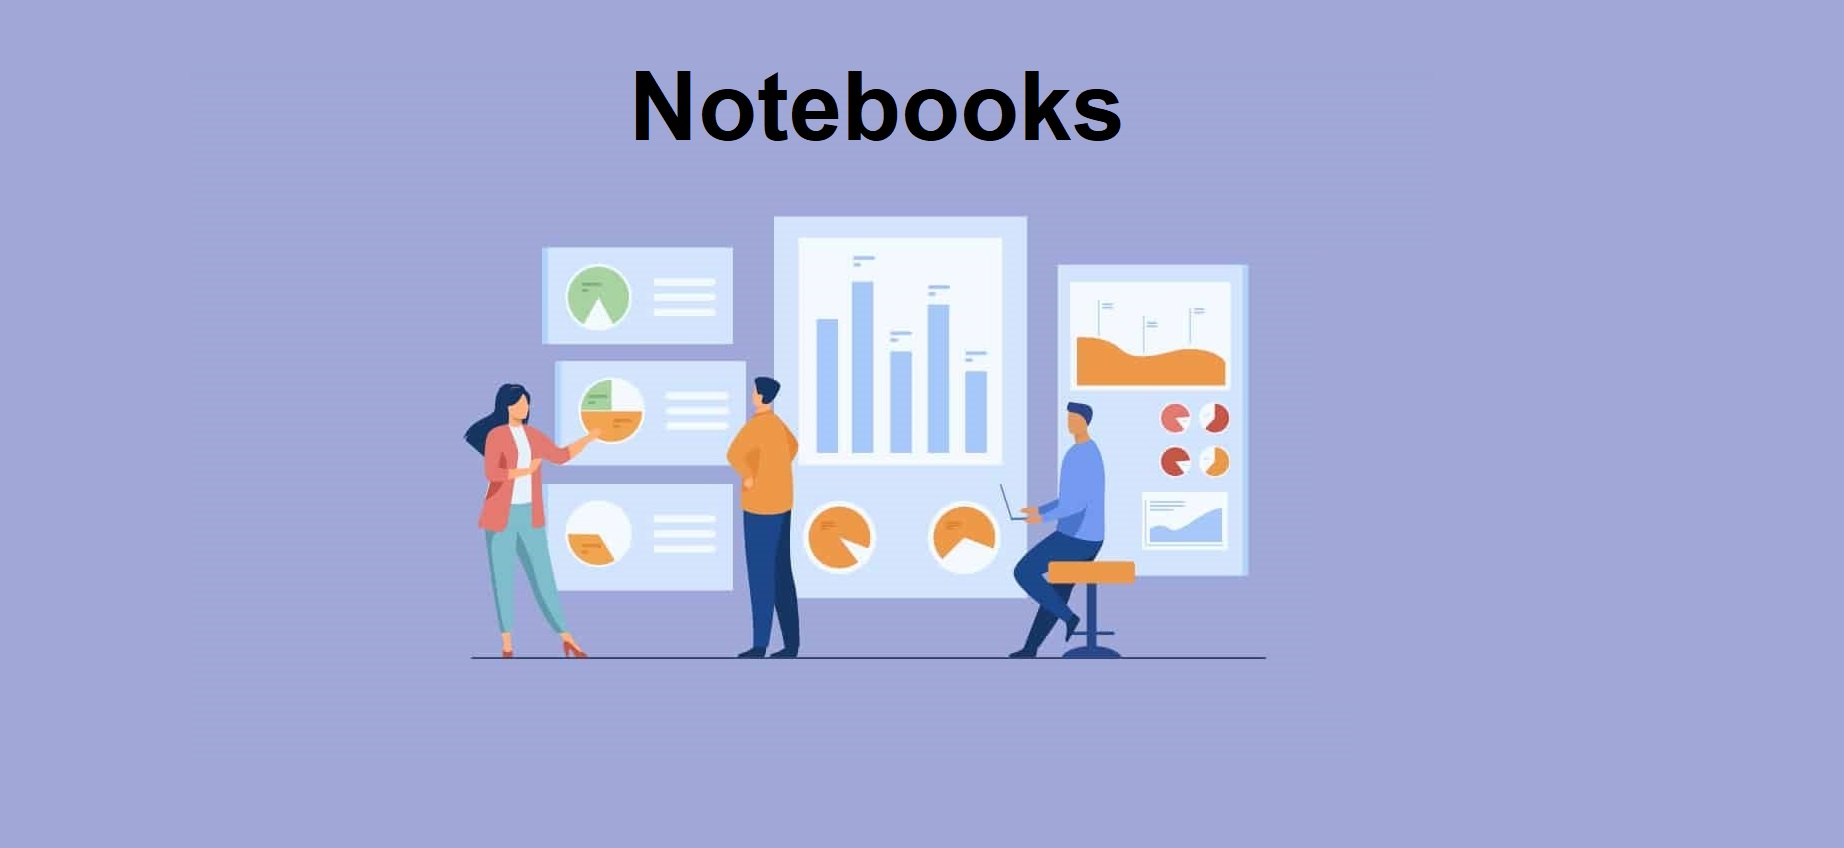

1. Import **libraries** and **datasets** 
2. Retreiving **AuthorUserId**
3. Displaying User **Kernels**
4. Displaying User **Kernels / Up-Votes**
5. Displaying User **Kernel / Up-Votes History**
6. Displaying User **Kernels / Views**

**NB : For this to work you need to insert your username:**

# Enter your UserName Here :

In [1]:
#------> User Name Here >-----#
userName = 'yacharki'
#------> User Name Here >-----#

# 1. Import libraries and datasets

In [2]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
from itertools import cycle, islice

colors = cycle(['#6A4545', '#6B7A55', '#90B860', '#4CC26E', '#EDA84C', '#BCCC6D','#EC6346','#3979D3','#E95DA6'])

In [3]:
users = pd.read_csv('../input/meta-kaggle/Users.csv')
kernels = pd.read_csv('../input/meta-kaggle/Kernels.csv')
kernelVotes = pd.read_csv('../input/meta-kaggle/KernelVotes.csv')

# 2. Retreiving AuthorUserId

In [4]:
CurrentUser = users[users['UserName'] == userName]
CurrentUser = CurrentUser['Id']
CurrentUser = CurrentUser.item()

# 3. Displaying User Kernels

In [5]:
CurrentUserKernels = kernels[kernels['AuthorUserId'] == CurrentUser]
CurrentUserKernelsVotes = kernelVotes[kernelVotes['UserId'] == CurrentUser]

CurrentUserKernels = CurrentUserKernels[['CurrentUrlSlug','TotalVotes', 'TotalViews']]
CurrentUserKernels

,CurrentUrlSlug,TotalVotes,TotalViews
715392,binary-text-classification-yelp-92-15-cnn,65,2398
715396,binary-classification-amazon-reviews-86-cnn,67,2130
715452,cross-testing-binary-cnn-models-amazon-yelp,51,1332
715482,traffic-signs-image-classification-97-cnn,137,24061
717022,5-class-classification-amazon-reviews-42-cnn,61,1231
718140,binary-classification-amazon-reviews-84-lstm,72,2430
718464,binary-classification-yelp-reviews-90-lstm,50,1305
718519,projet-tipe-classification-des-d-chets-resnet,45,2646
718562,5-class-classification-amazon-reviews-41-lstm,42,442
720809,5-class-classification-yelp-reviews-50-lstm,53,745


# 4. Displaying User Kernels / Up-Votes

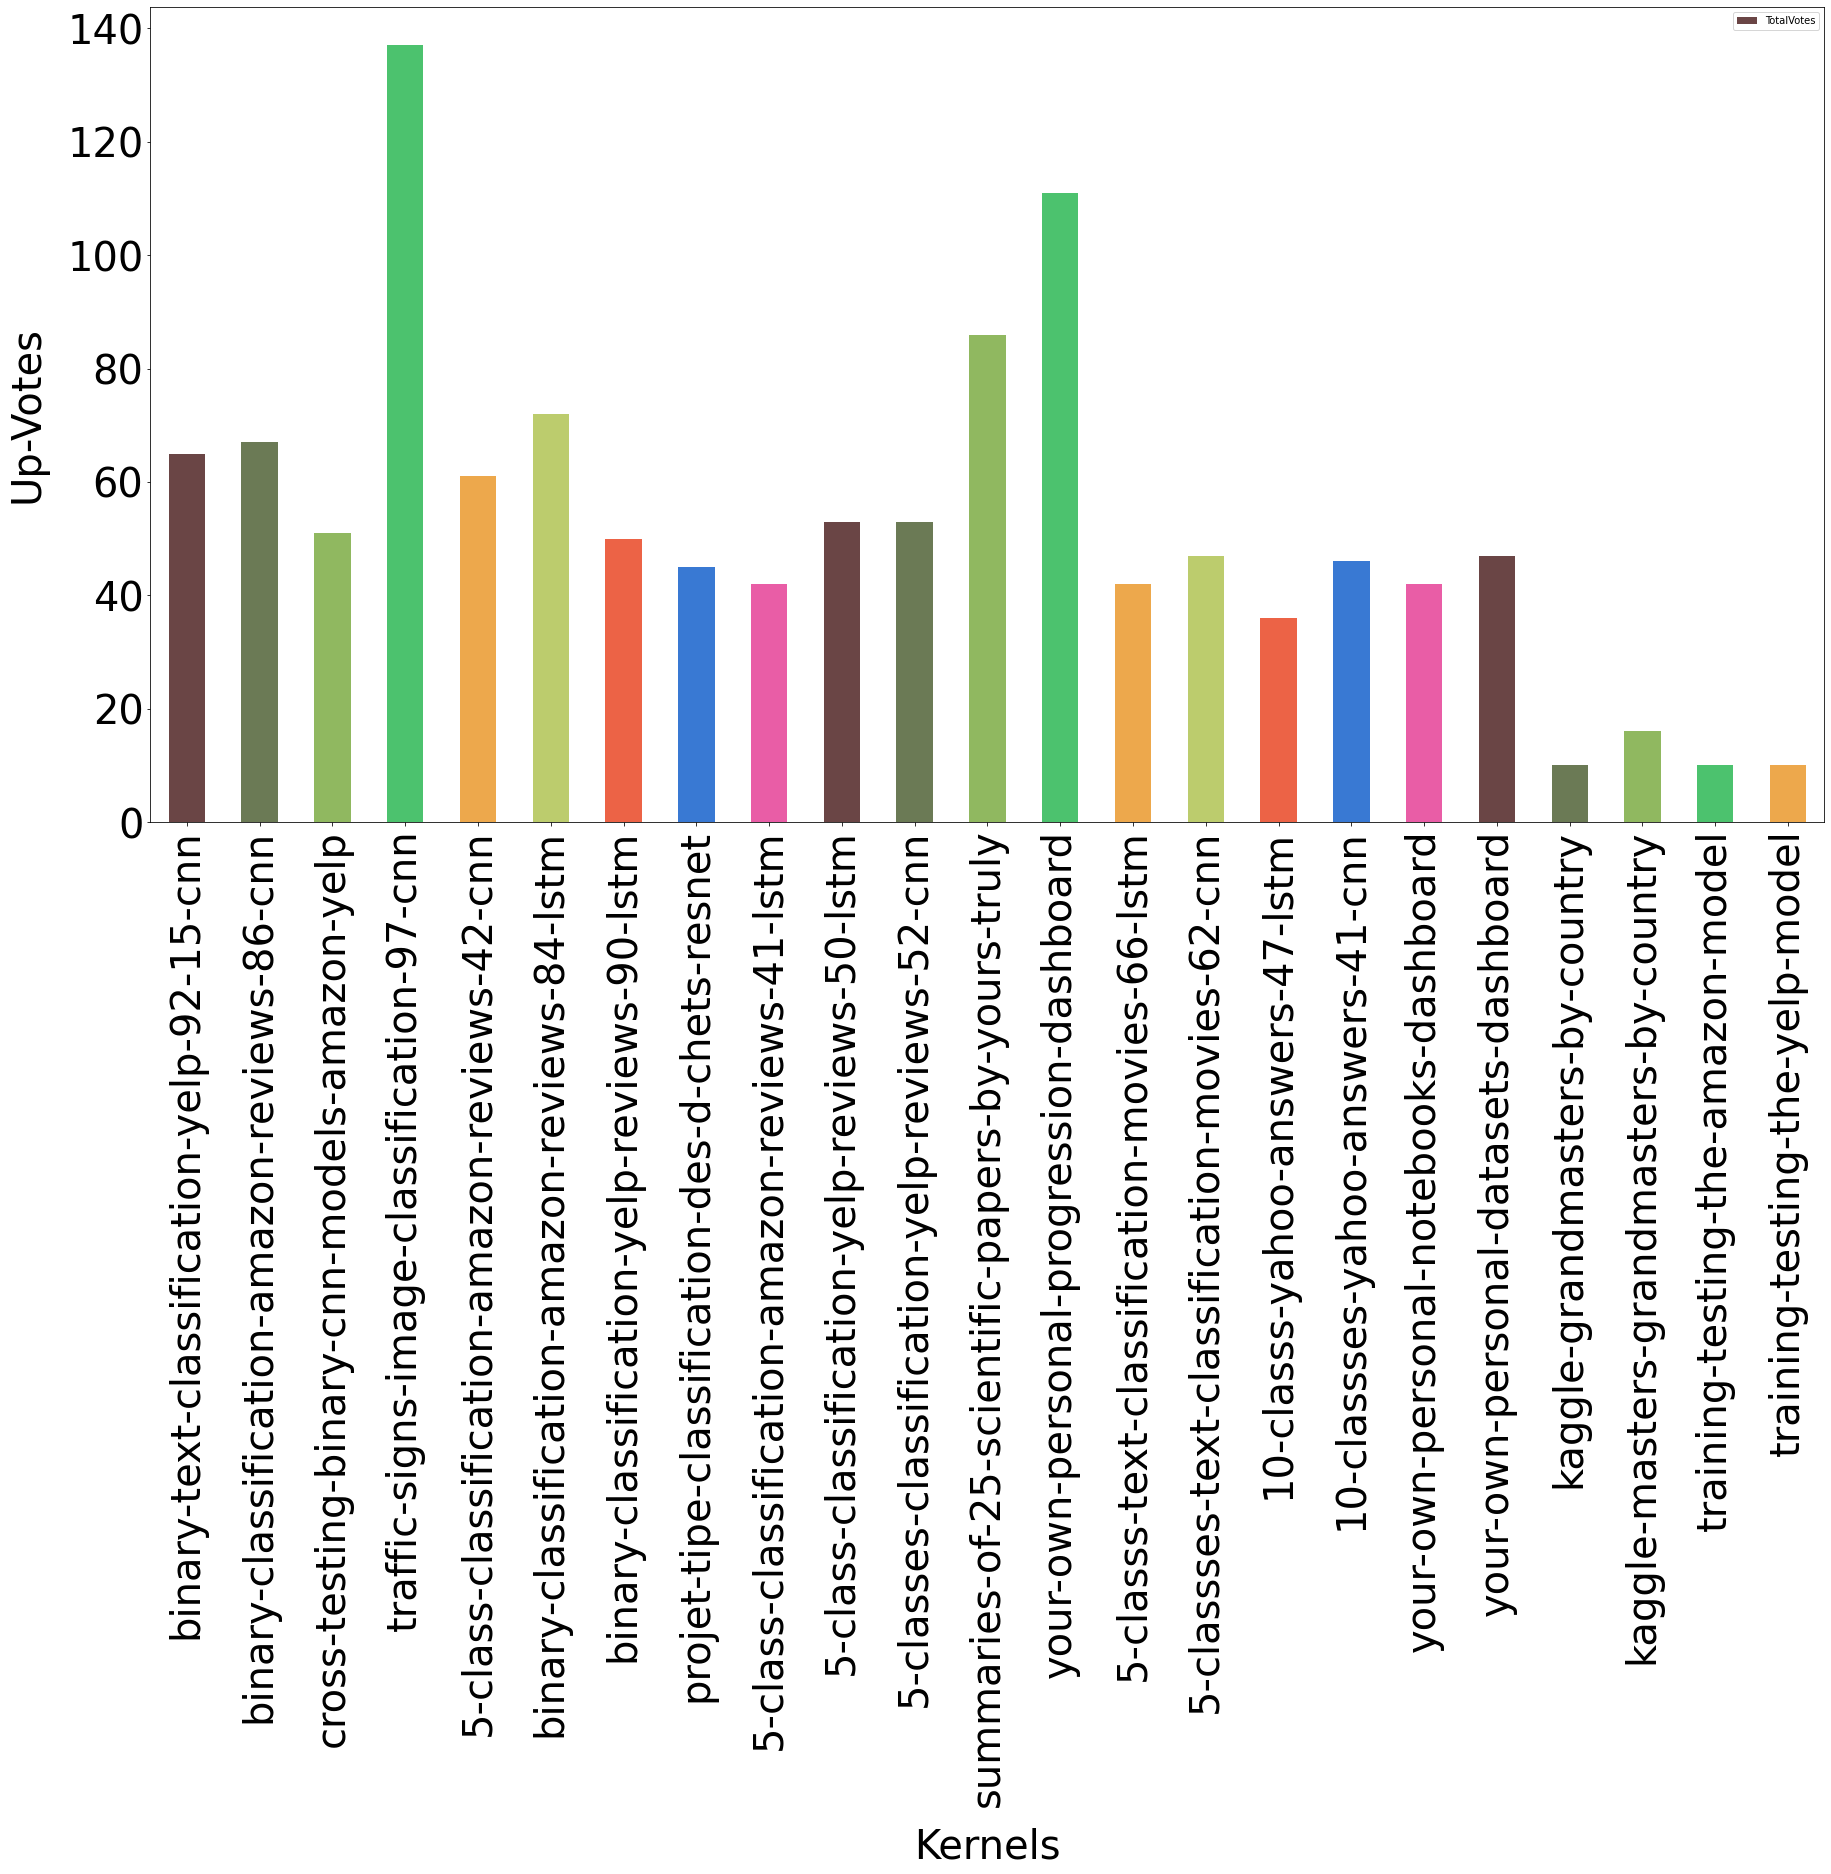

<Figure size 432x288 with 0 Axes>

In [6]:
my_colors = list(islice(colors, None, len(CurrentUserKernels)))
CurrentUserKernels.plot.bar(x='CurrentUrlSlug', y='TotalVotes', rot=90 , figsize=(30,15), color=my_colors)

plt.xlabel('Kernels', fontsize=40, labelpad=20)
plt.ylabel('Up-Votes', fontsize=40, labelpad=20)

plt.xticks(fontsize=40)
plt.yticks(fontsize=40)

fig = plt.figure()

plt.show()

# 5. Displaying User Kernel / Up-Votes History

In [7]:
RIP = CurrentUserKernelsVotes[['VoteDate']]
RIPSorted = RIP.sort_values(by='VoteDate')

In [8]:
RIPSorted

,VoteDate
3037463,01/02/2023
3015762,01/02/2023
2996219,01/02/2023
3066165,01/09/2023
3074870,01/12/2023
...,...
2891418,12/21/2022
3021737,12/27/2022
3024055,12/27/2022
3028931,12/28/2022


In [9]:
List = RIPSorted['VoteDate'].values

VoteDateDF = pd.DataFrame(columns = ["VoteDate", "Count"])

CurrentDate=''
LogDate=''
Count=0
FirstTime = True

for value in List:
    if FirstTime==True:
        CurrentDate = value
        LogDate = CurrentDate
        Count = 1
        FirstTime=False
    else:
        if LogDate == value:
            Count = Count +1
            CurrentDate = value
            LogDate = CurrentDate
        else:
            VoteDateDF = VoteDateDF.append({'VoteDate': LogDate, 'Count': Count}, ignore_index=True)
            Count = 1
            CurrentDate = value
            LogDate = CurrentDate

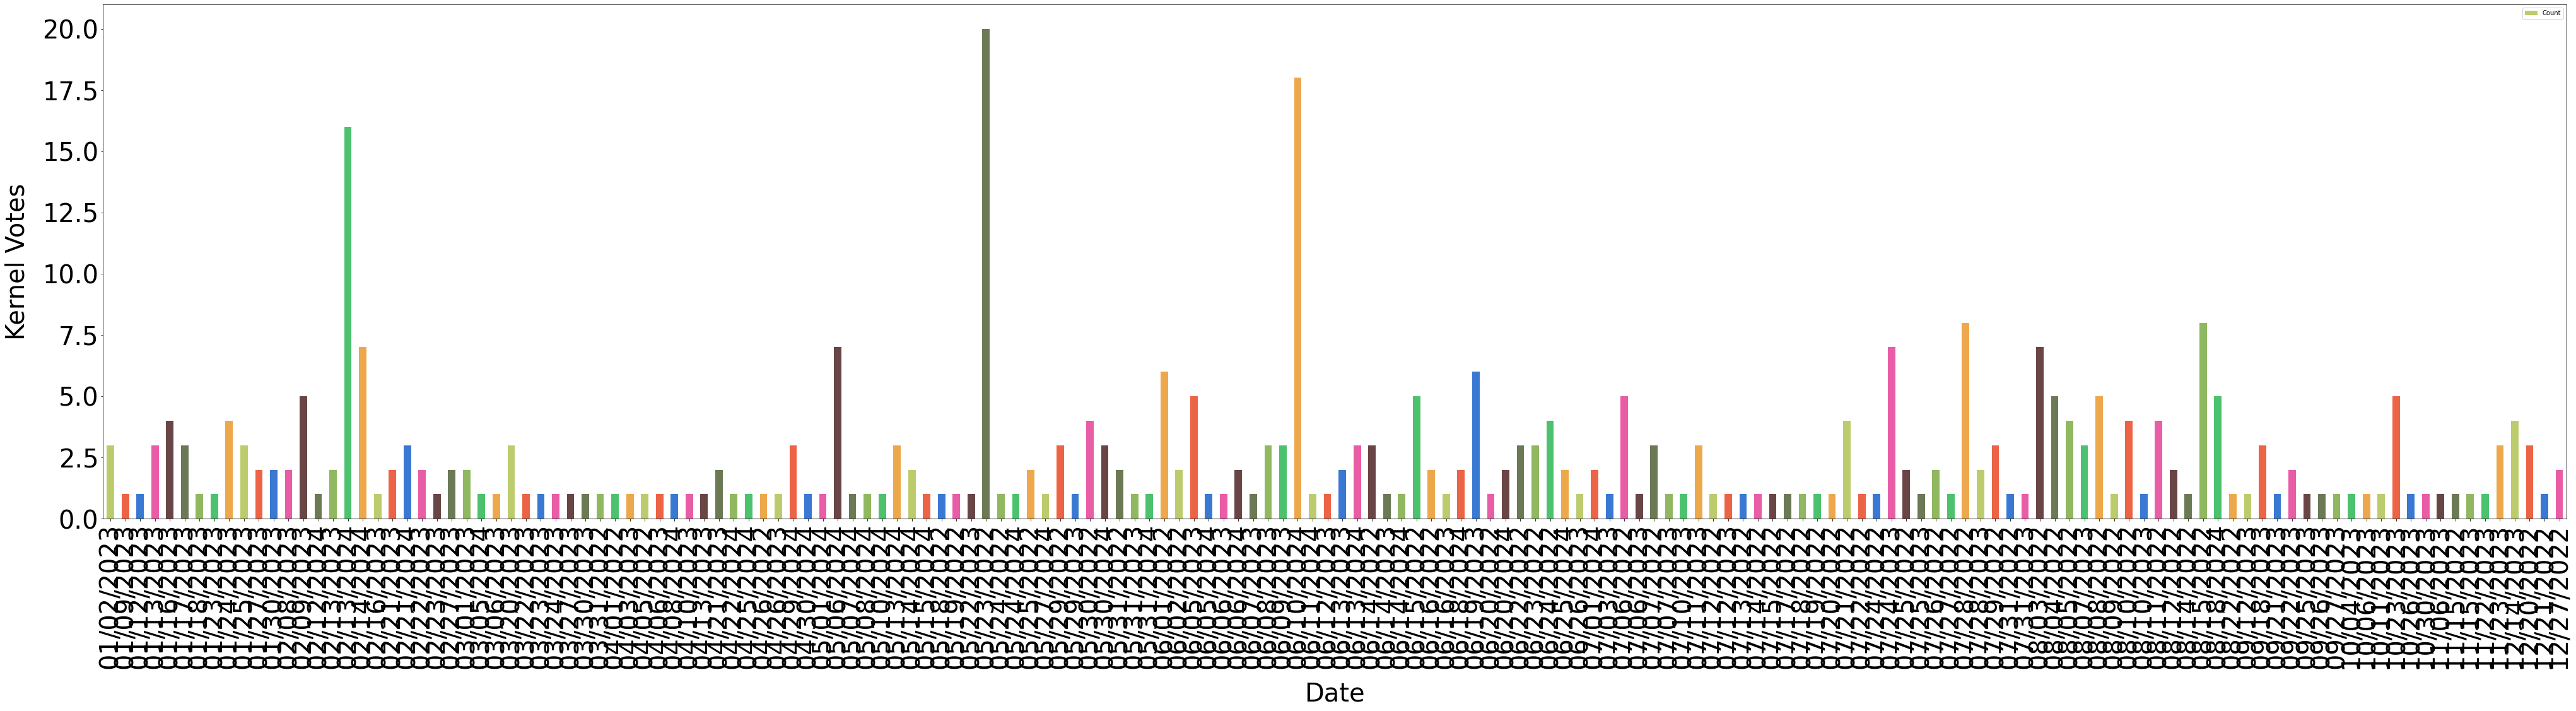

In [10]:
my_colors = list(islice(colors, None, len(VoteDateDF)))
VoteDateDF.plot.bar(x="VoteDate", y="Count", rot=90 , figsize=(70,15), color=my_colors)

plt.xlabel('Date', fontsize=40, labelpad=20)
plt.ylabel('Kernel Votes', fontsize=40, labelpad=20)

plt.xticks(fontsize=40)
plt.yticks(fontsize=40)

plt.show()

# 6. Displaying User Kernels / Views

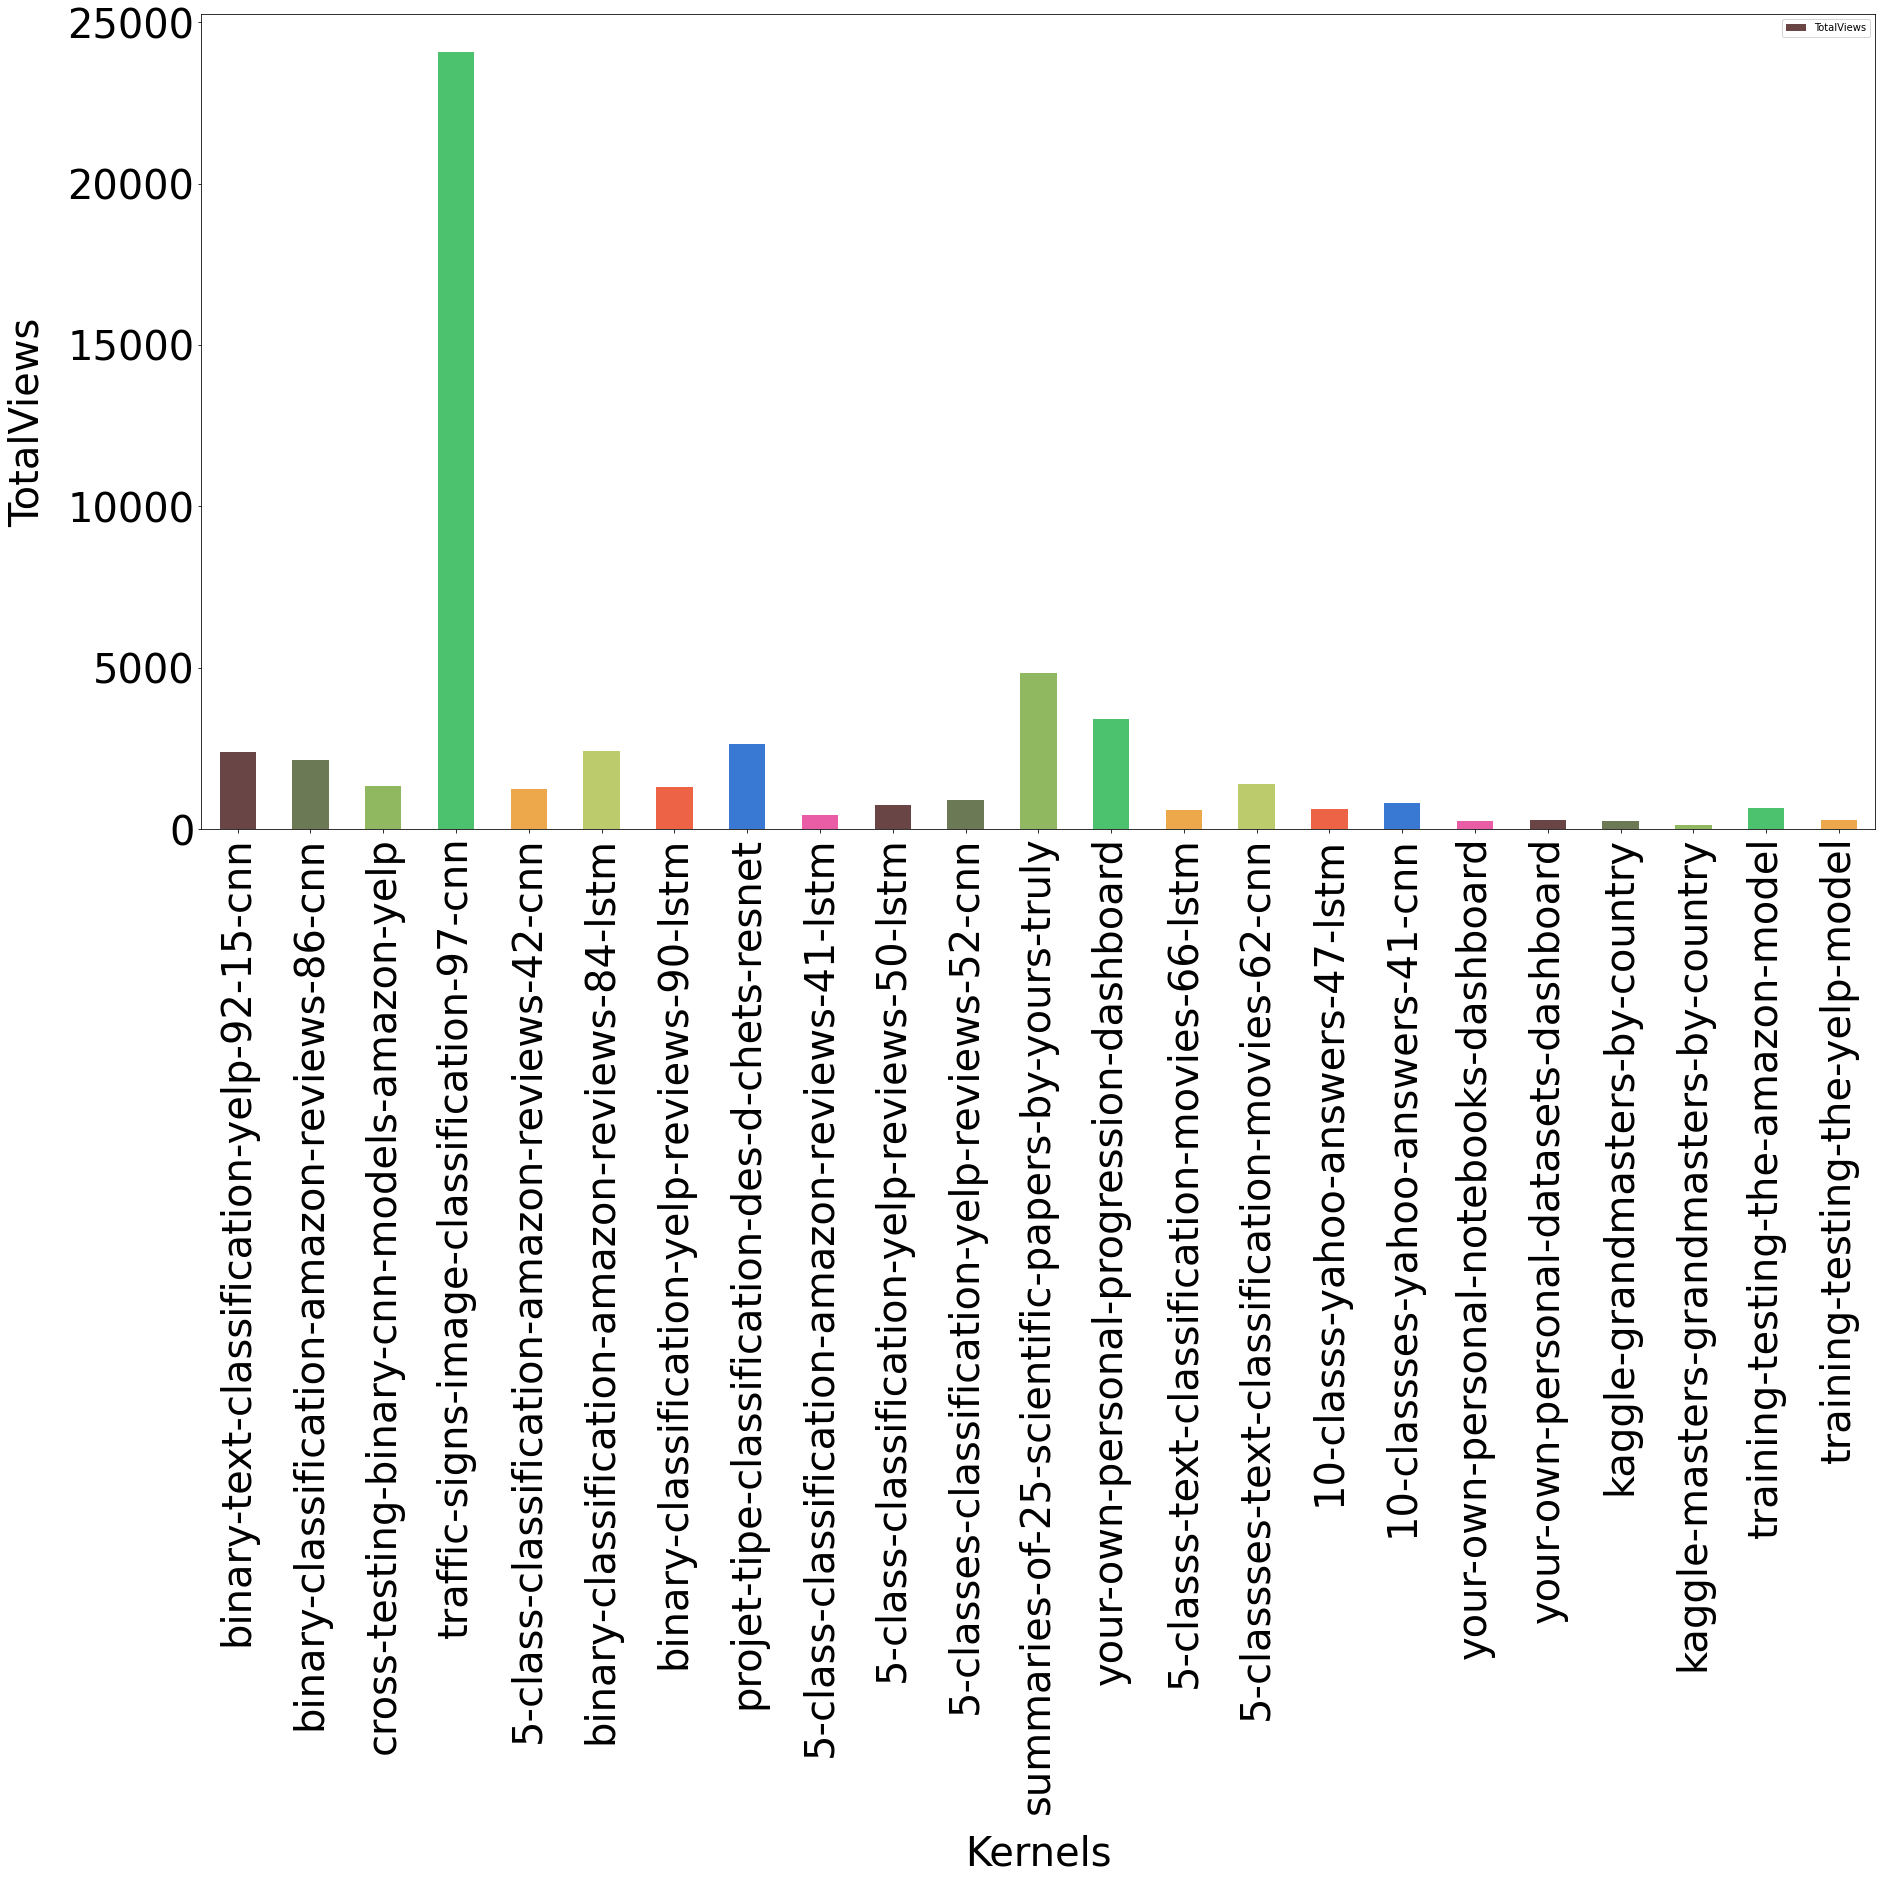

<Figure size 432x288 with 0 Axes>

In [11]:
my_colors = list(islice(colors, None, len(CurrentUserKernels)))
CurrentUserKernels.plot.bar(x='CurrentUrlSlug', y='TotalViews', rot=90 , figsize=(30,15), color=my_colors)

plt.xlabel('Kernels', fontsize=40, labelpad=20)
plt.ylabel('TotalViews', fontsize=40, labelpad=20)

plt.xticks(fontsize=40)
plt.yticks(fontsize=40)

fig = plt.figure()

plt.show()

# Please Let me know if you have any suggestion for me to add here.